***From the youtube guys (1 year ago)***

In [7]:
pip install google_play_scraper app_store_scraper


     ---------------------------------------- 0.0/41.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.1 kB ? eta -:--:--
     -------------------------------------- 41.1/41.1 kB 994.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/58.4 kB ? eta -:--:--
   ---------------------------------------- 58.4/58.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/128.0 kB ? eta -:--:--
   ---------------------------------------- 128.0/128.0 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
  Attempting uninsta

In [1]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

In [2]:
#google play store reviews:
g_reviews = reviews_all(
    #app id
        "com.crescivegames.twistedtangle",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )
#appstore reviews:
#also need app id
a_reviews = AppStore('us', 'twisted-tangle', '6447757125')
a_reviews.review()

2024-07-04 17:28:16,794 [INFO] Base - Initialised: AppStore('us', 'twisted-tangle', 6447757125)
2024-07-04 17:28:16,798 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/twisted-tangle/id6447757125
2024-07-04 17:28:21,893 [INFO] Base - [id:6447757125] Fetched 120 reviews (120 fetched in total)
2024-07-04 17:28:28,235 [INFO] Base - [id:6447757125] Fetched 280 reviews (280 fetched in total)
2024-07-04 17:28:34,014 [INFO] Base - [id:6447757125] Fetched 440 reviews (440 fetched in total)
2024-07-04 17:28:41,245 [INFO] Base - [id:6447757125] Fetched 620 reviews (620 fetched in total)
2024-07-04 17:28:47,361 [INFO] Base - [id:6447757125] Fetched 740 reviews (740 fetched in total)
2024-07-04 17:28:53,432 [INFO] Base - [id:6447757125] Fetched 860 reviews (860 fetched in total)
2024-07-04 17:28:59,575 [INFO] Base - [id:6447757125] Fetched 1020 reviews (1020 fetched in total)
2024-07-04 17:29:06,005 [INFO] Base - [id:6447757125] Fetched 1200 reviews (1200 fetched in total)

In [3]:
# Convert Google Play Store reviews to dataframe
g_df = pd.DataFrame(np.array(g_reviews), columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

# Remove unnecessary columns and rename columns for Google Play Store reviews
g_df2.drop(columns={'userImage', 'reviewCreatedVersion'}, inplace=True)
g_df2.rename(columns={'score': 'rating', 'userName': 'user_name', 'reviewId': 'review_id',
                      'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response',
                      'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'}, inplace=True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['language_code'] = 'en'
g_df2['country_code'] = 'us'

# Convert App Store reviews to dataframe
a_df = pd.DataFrame(np.array(a_reviews.reviews), columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

# Remove unnecessary columns and rename columns for App Store reviews
a_df2.drop(columns={'isEdited'}, inplace=True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['language_code'] = 'en'
a_df2['country_code'] = 'us'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns={'review': 'review_description', 'userName': 'user_name', 'date': 'review_date',
                      'title': 'review_title', 'developerResponse': 'developer_response'}, inplace=True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)

In [4]:
# Save Google Play Store reviews to CSV
g_df2.to_csv('tangle_android.csv', index=False)

# Save App Store reviews to CSV
a_df2.to_csv('tangle_ios.csv', index=False)

In [11]:
result = pd.concat([g_df2,a_df2])
result.to_csv('tangle_reviews.csv', index=False)

Make a word cloud from reviews

In [12]:
pip install wordcloud pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


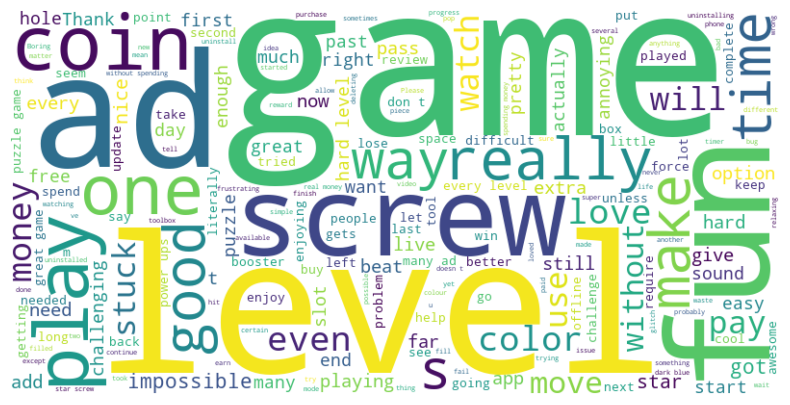

In [13]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the reviews from the CSV file
reviews_df = pd.read_csv('D:\\Downloads\\VSCode\\Python\\DA\\onjobtrain\\screwjamreviews.csv')

# Step 2: Concatenate all reviews into a single text
all_reviews = ' '.join(review for review in reviews_df['review_description'])

# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


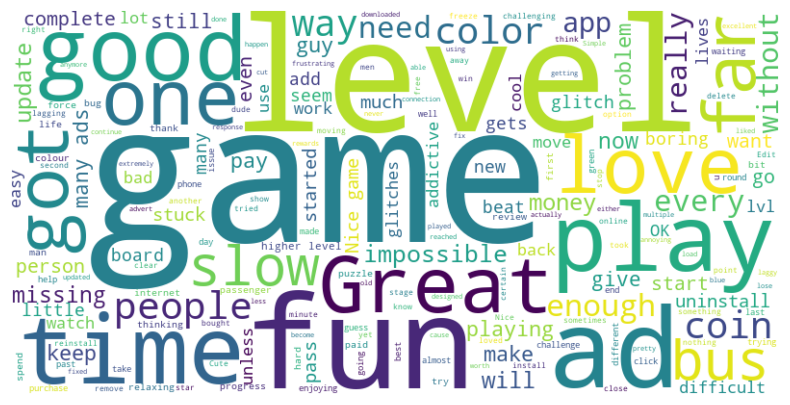

In [4]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the reviews from the CSV file
reviews_df = pd.read_csv('D:\\Downloads\\VSCode\\Python\\DA\\onjobtrain\\busjamreviews.csv')

# Step 2: Filter reviews for Google Play
google_play_reviews = reviews_df[reviews_df['source'] == 'Google Play']

# Step 3: Concatenate all Google Play reviews into a single text
all_reviews = ' '.join(review for review in google_play_reviews['review_description'])

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


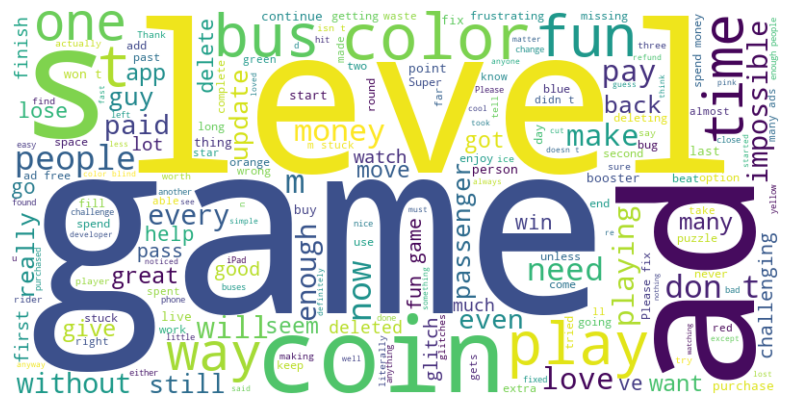

In [5]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the reviews from the CSV file
reviews_df = pd.read_csv('D:\\Downloads\\VSCode\\Python\\DA\\onjobtrain\\busjamreviews.csv')

# Step 2: Filter reviews for Google Play
google_play_reviews = reviews_df[reviews_df['source'] == 'App Store']

# Step 3: Concatenate all Google Play reviews into a single text
all_reviews = ' '.join(review for review in google_play_reviews['review_description'])

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


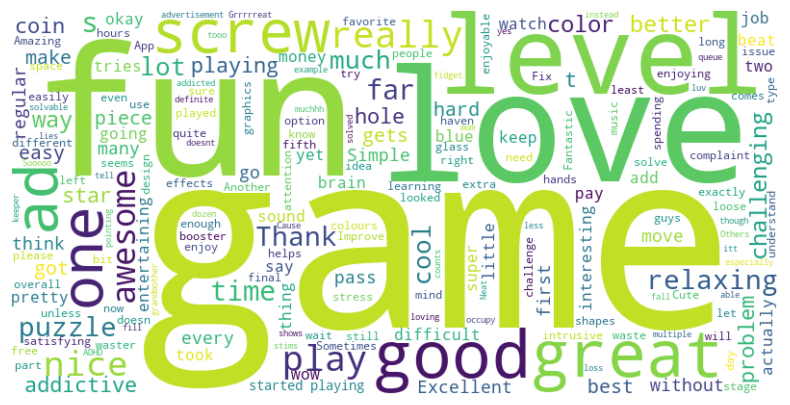

In [17]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the reviews from the CSV file
reviews_df = pd.read_csv('D:\\Downloads\\VSCode\\Python\\DA\\onjobtrain\\screwjamreviews.csv')

# Step 2: Filter reviews for Google Play
google_play_reviews = reviews_df[reviews_df['rating'] == 5]

# Step 3: Concatenate all Google Play reviews into a single text
all_reviews = ' '.join(review for review in google_play_reviews['review_description'])

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
